<center><h2>Midterm - Data Science option</h2></center>

This is one of two options for the midterm. 

This option is in-depth analysis of online shopping behavior.  

We are asking you to do intensive analysis of consumer behavioral data.

The data
----

The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

The tasks
-----

Perform the following tasks:

1. Task 1 - Build a highly predictive classification model. Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)

    1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics
    1. Show and explain the hyper-parameter fitting process.

    Point breakdown:
    
    - (10 points) Basic exploratory data analysis (EDA) 
        - Appropriate univariate descriptive statistics and figures
        - Appropriate bivariate descriptive statistics and figures
    - ( 5 points) Advanced EDA
        - Free-response, shows us what they know! 
    - ( 5 points) Train/test split
    - (10 points) Feature selection
    - (15 points) Model fitting
    - ( 5 points) Performance points 
        - F1 score is in the top quartile among all students 


2.  Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).

    1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).
    
    Point breakdown:
    
    - (15 points) Clustering code
    - (10 points) Clustering analysis

3. Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

    1. If you do not consider the records from Oct-Dec, generate the classification performance on test data
    2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

    Point breakdown:
    
    - ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
    - (8 points) Generate labels for unlabeled samples with a self labeling technique
    - (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

-----

Remaining points breakdown:
 - (10 points) Style and clarity
     - Please attempt to write clear, well-commented code and explanations in markdown cells, where appropriate. 

------

Your deliverables:

- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

__That's it. Good Luck!__

<br>
<br> 
<br>

----

### Load the necessary modules and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import operator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [2]:
!pip install --upgrade yellowbrick

### Load the data



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/My Drive/Fourthbrain_MLE/mid_term/online_shoppers_intention.csv")
df.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]

### Task 1

*  Splitting the dataset into training and testing sets
    * Train: June - Dec
    * Test: Feb - Mar



In [5]:
# Train months: June to December
train_months = ['June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov' 'Dec']
# Test months: Feb & March
test_months = ['Feb', 'Mar']

# Creating train and test datasets based on train and test months
df_train = df[df["Month"].isin(train_months)]
df_test = df[df["Month"].isin(test_months)]

In [6]:
# printing the shape of the data 
print("The training data has", df_train.shape[0], "datapoints and", df_train.shape[1] -1, "features")
print("The testing data has", df_test.shape[0], "datapoints and", df_test.shape[1] -1, "features")

print("This means that there have been 3x the sessions in the test months vs. the train months.")

The training data has 2150 datapoints and 17 features
The testing data has 2091 datapoints and 17 features
This means that there have been 3x the sessions in the test months vs. the train months.


#### Exploratory Data Analysis 


*  We have 6 categorical variables and 10 numerical variables
*   The training data doesn't seem to have any special days while the testing data does
*   I'll be dropping Special Day from the train and test sets because it won't be used while training the model









In [7]:
pd.set_option('display.max_columns', None)
print("Data Info:")
ind_list = []
col_names_list = []
non_null_count = []
dtype_list = []
for ind, col_names, non_null, dtype in zip(range(0, len(df_train.columns)-1), df_train.columns, df_train.notnull().count(axis=1), df_train.dtypes):
  ind_list.append(ind)
  col_names_list.append(col_names)
  non_null_count.append(non_null)
  dtype_list.append(dtype)

df_info = pd.DataFrame()
df_info['ind_list'] = ind_list
df_info['col_names_list'] = col_names_list
df_info['non_null'] = non_null_count
df_info['dtype'] = dtype_list

print(df_info.head(20))
print(" ")
print("Summary Statistics:")
print(df_train.describe())

Data Info:
    ind_list           col_names_list  non_null    dtype
0          0           Administrative        18    int64
1          1  Administrative_Duration        18  float64
2          2            Informational        18    int64
3          3   Informational_Duration        18  float64
4          4           ProductRelated        18    int64
5          5  ProductRelated_Duration        18  float64
6          6              BounceRates        18  float64
7          7                ExitRates        18  float64
8          8               PageValues        18  float64
9          9               SpecialDay        18  float64
10        10                    Month        18   object
11        11         OperatingSystems        18    int64
12        12                  Browser        18    int64
13        13                   Region        18    int64
14        14              TrafficType        18    int64
15        15              VisitorType        18   object
16        16        

##### Univariate Analysis
I want to visualize the Numerical columns under the train set first by plotting simple distributions for each one of them. 

**Administrative:** Most sessions visit 0-5 administrative pages and spend under 250 seconds (assuming its seconds, its not mentioned anywhere) on Administrative pages

**Informational:** Most sessions visit 0-1 informational pages and spend under 250 seconds on Informational pages

**Product Related:** Most sessions visit less that 50 product related pages and under 2500 seconds — which is a lot!!! I hypothesize that this is the main predictor of whether someone makes a purchase or not

**Bounce Rates:** Most sessions have a bounce rate of less than 2.5%

**Exist Rates:** Most sessions have an exit rate of less than 7.5%

**Page Values:** Most sessions have a pagevalue of less than 25

**Special Day:** The training dataset doesn't have any special days. They're all 0


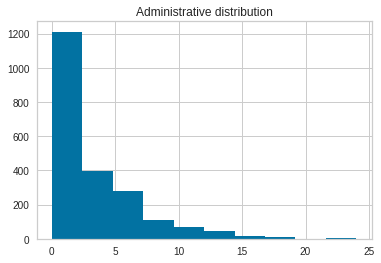

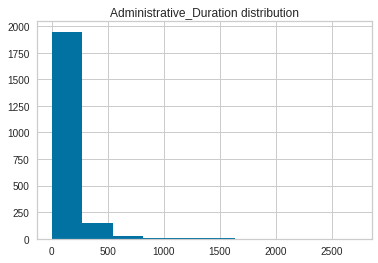

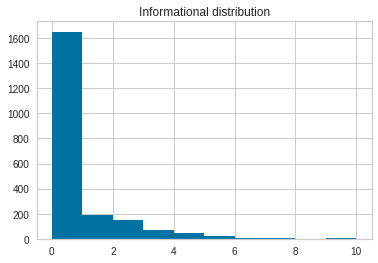

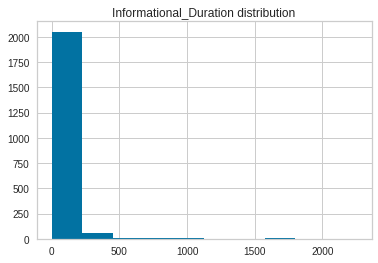

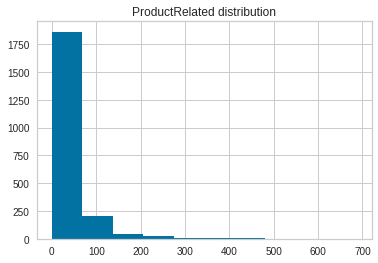

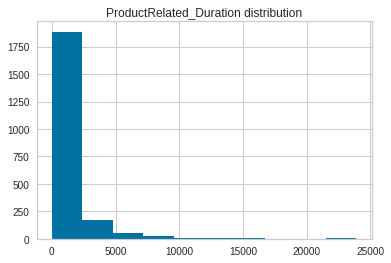

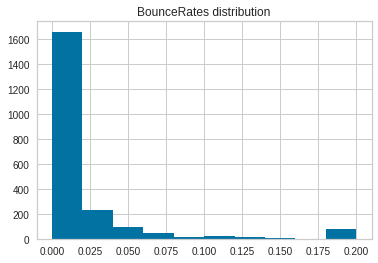

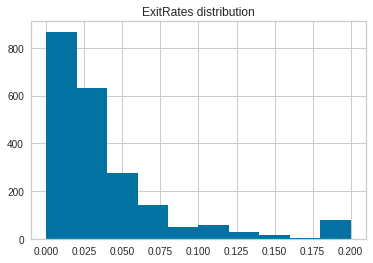

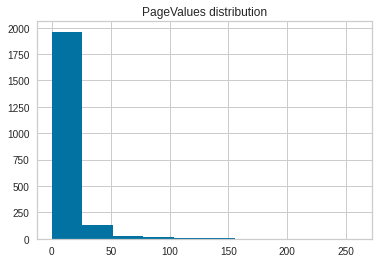

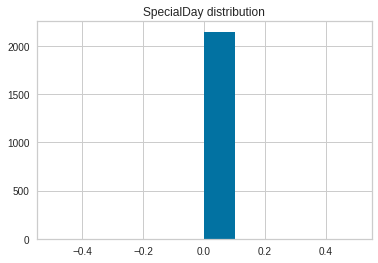

In [8]:
numeric_columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", 
                   "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]
for col in numeric_columns:
  plt.hist(df_train[col])
  plt.title(f'{col} distribution')
  plt.show()

Next I plot some simple bar charts to visualize the categorical variables on the train set

**Operating Systems:** Operating systems 1, 2, 3 are the most popular 

**Region**: A big chunk of sessions belong to regions 1 and 3, the second most popular region seems to be 2 and 4

**TrafficType:** 1 through 5 have the most sessions attributed to them

**VisitorType:** We have a very large number of returning visitors which makes me wonder if this is a high value item we're selling. It might require more visits and some thinking to make a purchase

**Browser**: Browser 2 has the most number sessions. We need to optimize User Experience for Browser 1 and 2

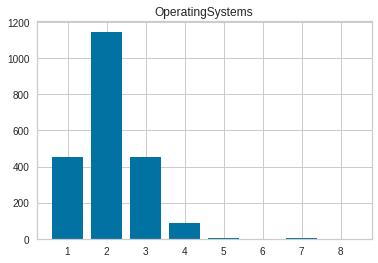

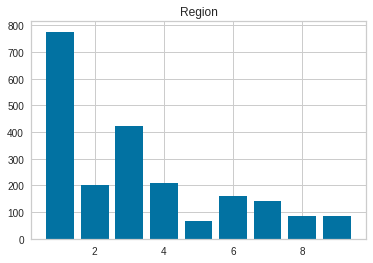

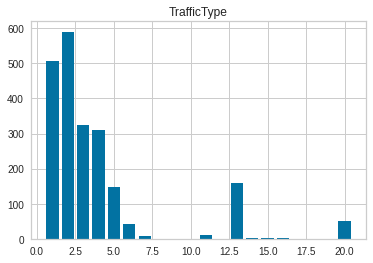

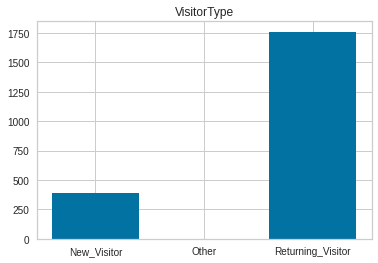

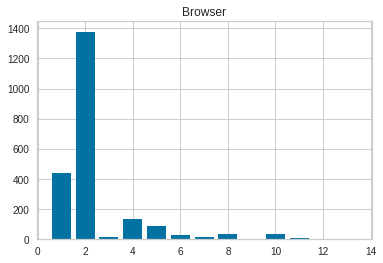

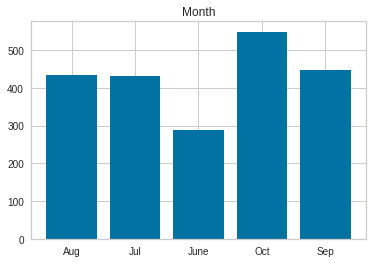

In [9]:
col_names = ['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser', 'Month']
for i in col_names: 
  plt.bar(pd.DataFrame(df_train.groupby([i]).size()).reset_index().iloc[:, 0], pd.DataFrame(df_train.groupby([i]).size()).reset_index().iloc[:, 1])
  plt.title(f'{i}')
  plt.show()


I explore categorical variables for the test dataset as well. 

**Special Day:** The test dataset has some special days but we won't be using this feature as we cannot get a signal from it in the train set

Every other feature seems to have the same performance as the training dataset

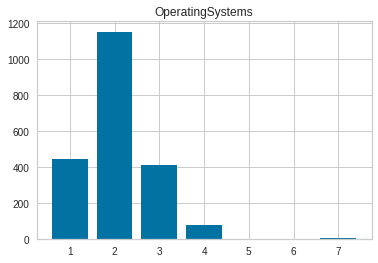

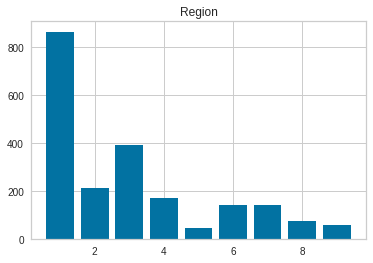

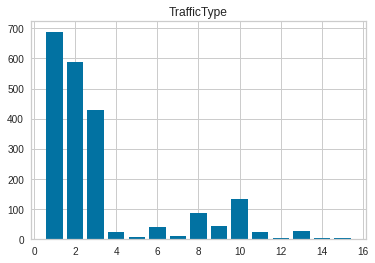

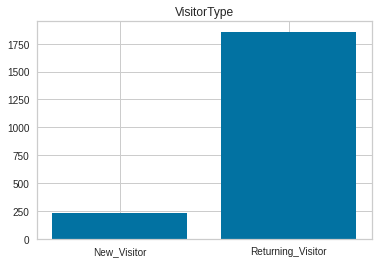

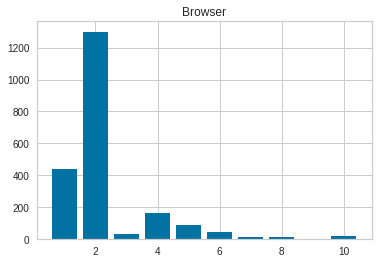

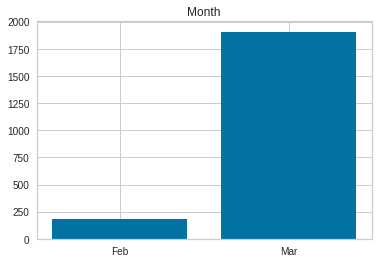

In [10]:
col_names = ['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser', 'Month']
for i in col_names: 
  plt.bar(pd.DataFrame(df_test.groupby([i]).size()).reset_index().iloc[:, 0], pd.DataFrame(df_test.groupby([i]).size()).reset_index().iloc[:, 1])
  plt.title(f'{i}')
  plt.show()


##### Bivariate Analysis

I don't notice big differences of purchase vs. no purchase by categorical variables. % of purchases across all categories seems to be very small compared to those sessions that don't have purchases

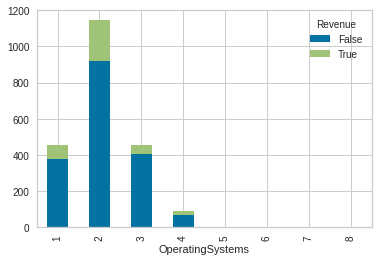

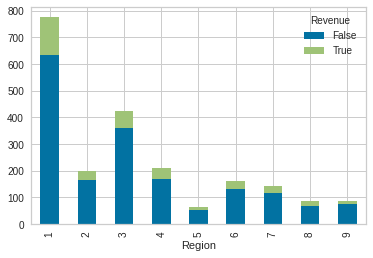

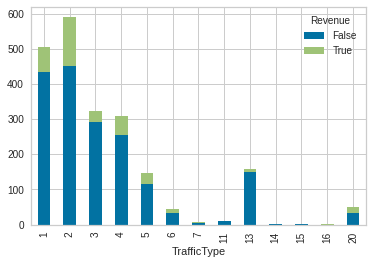

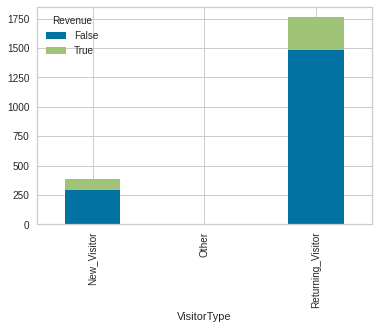

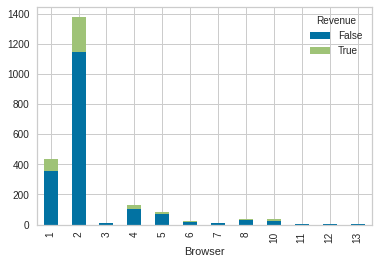

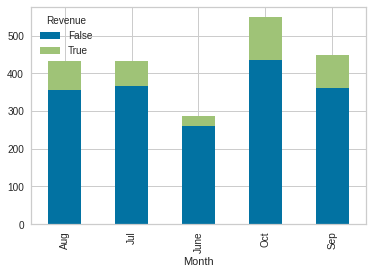

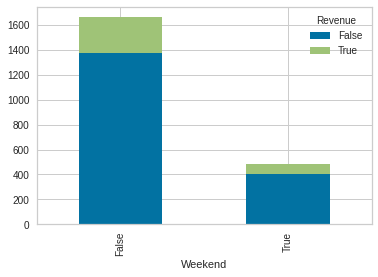

In [11]:
col_names = ['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser', 'Month', 'Weekend']
for i in col_names: 
  df_train.groupby([i, 'Revenue'])[i].count().unstack('Revenue').fillna(0).plot(kind='bar', stacked=True)




*   We have a highly imbalanced target variable, only 17% have made a purchase


In [12]:
print(df_train.Revenue.groupby(df_train.Revenue).size())

y_train_counts = df_train.Revenue.groupby(df_train.Revenue).size()

print(y_train_counts / y_train_counts.sum()*100)

Revenue
False    1778
True      372
Name: Revenue, dtype: int64
Revenue
False    82.697674
True     17.302326
Name: Revenue, dtype: float64


##### Advanced Visualization

I want to view distributions by some of the numerical variables. 

*   Informational Duration and Administrative Duration: the distribution of purchase and no purchase remains the same when I plot it against these two variables
*   Product Related Duration: oddly enough there are some sessions that spend a lot of time on product related pages but don't end up making a purchase. There seems to be a pattern of window shopping, information gathering before returning and making a purchase
*  Exit Rates for customers who don't make a purchase can be very very high wheras for customer who make a purchase are somewhat on the lower side
*  Bounce Rates: Same goes for bounce rates
*  Pagevalues: customers who make a purchase have higher page values than those who donot. I want to learn more about how this metric is calculated before making any comments on why this may be the case

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

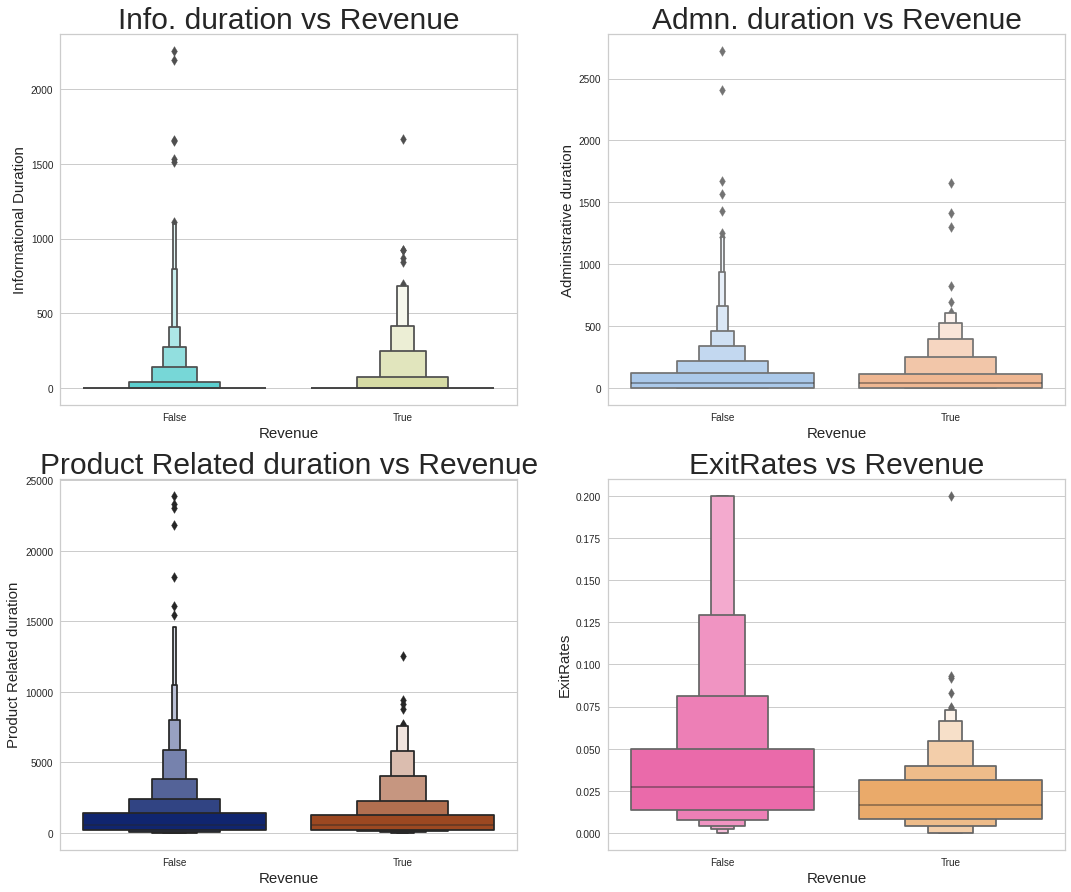

In [13]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df_train['Revenue'], df_train['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Informational Duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(df_train['Revenue'], df_train['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Administrative duration', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(df_train['Revenue'], df_train['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Product Related duration', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(df_train['Revenue'], df_train['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ExitRates', fontsize = 15)


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


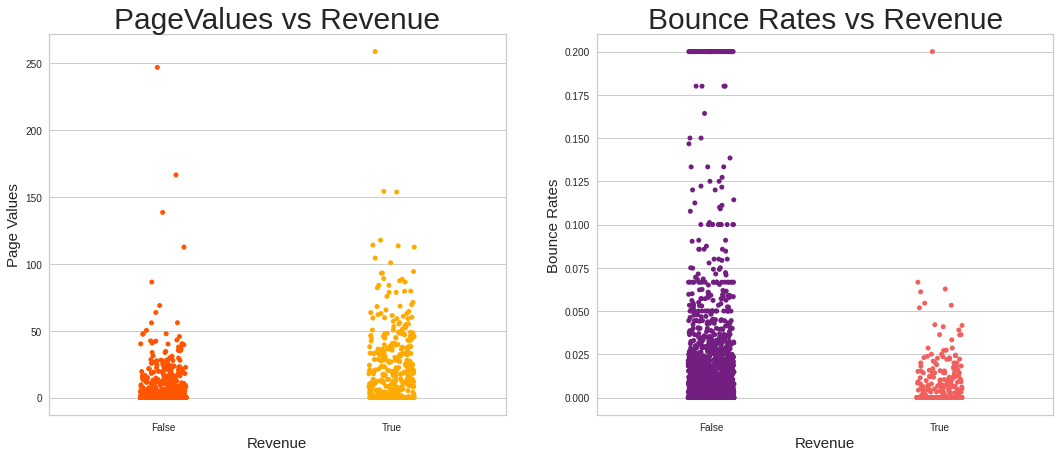

In [14]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df_train['Revenue'], df_train['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Page Values', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(df_train['Revenue'], df_train['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Bounce Rates', fontsize = 15)

plt.show()

#### Data Tranformation
* Weekend and Revenue columns to numbers 0, 1
* VisitorType column to 0, 1, 2
* Month names to month numbers

In [15]:
#False is mapped to 0, True is mapped to 1
tf_mapping = {False:0, True:1}

# changing weekend to binary
df_train['Weekend'] = df_train['Weekend'].map(tf_mapping)
df_test['Weekend'] = df_test['Weekend'].map(tf_mapping)

#changing revenue to binary
df_train['Revenue'] = df_train['Revenue'].map(tf_mapping)
df_test['Revenue'] = df_test['Revenue'].map(tf_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc


#### Prep for Training
*   Creating the target label 
*   Dropping the target label and Special Day from the train dataset



In [16]:
# dropping Revenue, specialday and month because they don't make sense to include in the training set
y_train = df_train['Revenue']
df_train = df_train.drop(['Revenue', 'SpecialDay', 'Month'], axis = 1)

#doing the same for testing because I need the same columns
y_test = df_test['Revenue']
df_test = df_test.drop(['Revenue', 'SpecialDay', 'Month'], axis = 1)


In [17]:
# getting dummy variables for categorical variables
df_train_d = pd.get_dummies(data=df_train, columns=['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser'], drop_first=True)
df_test_d = pd.get_dummies(data=df_test, columns=['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser'], drop_first=True)

In [18]:
#creating a function to fill in the missing columns for test and train sets
def fill_missing_cols(df_a, df_b):
  missing_cols = set(df_a.columns) - set(df_b.columns)
  for c in missing_cols:
    df_b[c] = 0
  df_b = df_b[df_a.columns]

#filling in the missing columns for test and train sets
fill_missing_cols(df_test_d, df_train_d)
fill_missing_cols(df_train_d, df_test_d)

#### Training the Model

**Correlation Matrix**

Before training the classifiers, I wanted to to see which variables are correlated with eachother and which ones are correlated with the target variable, Revenue. 

After plotting the overall correlation matrix, I deep dive into some features below. 

In [19]:
df_corr = df_train_d.copy()
df_corr['Revenue'] = y_train
df_corr = df_corr.corr()
df_corr.round(2).style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax




*   Administrative: 
      * is correlated with Administrative Duration the most which makes sense — if a customer is going to a lot of Administrative pages, they are also spending a lot of time on these pages
      * is also correlated with ProductRelated and ProductRelated_Duration — this is less obvious to me. Is it possible that those customers that spend time on administrative pages are somehow directed to ProductRelated pages so that they'd be tempted to make a purchase? 
      * It is also correlated with Informational and Information_Duration. Again this is less obvious to me but I would also like to know more about what kind of information is available on these Informational pages? Are these brand building pages that share more information about the product or are these more to do with logistical information. For eg: when your order is getting delivered, etc.? 
*   Administrative Duration: 
      * Shows the same trends as Administrative
*   Informational:
      * is very highly correlated with Informational Duration which makes sense, similar behavior to Administrative and Administrative Duration
      * But it is also very highly correlated with Product Related and ProductRelated_Duration which makes me wonder if they are being directed to these pages through a Call-to-action of some sort

*   Informational Duration: 
      * shows the same trends

*   Bounce Rates and Exit Rates are very highly correlated — expected behavior, if a customer bounces, then they haven't seen much of the webpage
*.   Page Value is not highly correlated with any type of page. It is slightly negatively correlated with Bounce Rate and Exist Rate which means that if a page has high bounce and exit rates, they don't have a lot of page value. However, I would expect ProductRelated and ProductRelated_Duration to be very highly correlated with PageValue — after all a customer has to land there to be able to make a purchase is what I'm assuming 



In [20]:
df_corr.iloc[:9, :9].style.background_gradient(cmap='coolwarm')

I also notice that certain Operating Systems are correlated with certain Browser types. For instance, you see Operating System 2 slightly correlated with Browser 2 and 4. Whereas, Operating System 3 is correlated with Browser 2

In [21]:
df_corr[['OperatingSystems_2', 'OperatingSystems_3']].style.background_gradient(cmap='coolwarm')

Lastly, I wanted to see which variables are correlated with the the target variable and we see only PageValues to be correlated. 

In [22]:
df_corr[['Revenue']].style.background_gradient(cmap='coolwarm')


I try two Classfiers. For hyperparameter tuning, I use GridSearchCV. 

*   **Logistic Regression**
    * C: 1 or 10. Since the model consistently picks 1, I don't try any other number since 1 is the minimum. This specifies stronger regularization. 
    * solver: I try all solvers for the optimization problem but the most optimal one is lbfgs
    * max_iter: max iterations taken for the solver to converge is consistently 100 so I don't try larger values
    * penalty: for regularization, I try all three and GridSearchCV consistenly picks l2

*   **Random Forest Classifier**
    * Criterion: the function used to measure the quality of split. GridsearchCV picks gini as the most optimal one
    * max_depth: this is usually done to prune the tree. After a point, increasing the tree size doesn't yield better results. I try multiple max depths but it picks 13 as the most optimal
    * min_samples_leaf: the minimum number of samples required at any leaf node. the model picks 7. I try smaller values but it consistently picks 7
    * n_estimators: the number of trees in the forest. this was a bit harder to tune because I had to inidividually try out different values. However, performance didn't improve much after 300 so I kept it at 300



In [23]:
param_lr ={'C': [1, 10], 
           'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
           'max_iter': [100, 110, 120],
           'penalty': ['l2', 'elasticnet', 'none']}

param_rf = {"criterion": ["gini", "entropy"], 
            "max_depth": [5, 7, 9, 11, 13], 
            "min_samples_leaf": [7,9, 11], 
            "min_samples_split": [5, 7, 9],
            "n_estimators": [300],
            "max_features": ["auto"]}
            # "max_leaf_nodes": range(1, 30, 5)}

lr = LogisticRegression(class_weight="balanced")

rf = RandomForestClassifier(random_state = 42,  warm_start = True, class_weight = 'balanced')

clf_list = [lr, rf]

param_list = [param_lr, param_rf]



##### Classfier 1: Logistic Regression

In [24]:
# Training the logistic regression classifier
lr_result = []
lr_clf = GridSearchCV(estimator= clf_list[0], 
                  param_grid=param_list[0], 
                  scoring='f1',
                  cv=10)
  
lr_clf.fit(df_train_d, y_train)
lr_result.append({
                'grid': lr_clf,
                'classifier': lr_clf.best_estimator_,
                'best score': lr_clf.best_score_,
                'best params': lr_clf.best_params_,
                'cv': lr_clf.cv
            }
        )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [25]:
#printing the best classifier for logistic regression, training score, the model is optimizing for f1-score
print("Logistic Regression:", lr_result)

Logistic Regression: [{'grid': GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'max_iter': [100, 110, 120],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return

In [29]:
lr_clf_for_coef = LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

lr_clf_for_coef.fit(df_train_d, y_train)

print(lr_clf_for_coef.coef_, df_train_d.columns)

[[ 6.63653307e-03  1.23853705e-04  1.44525323e-02  4.61468343e-04
  -2.77812713e-04  1.72028290e-05 -1.95752260e-02 -2.81996463e-02
   1.01221809e-01 -6.73759990e-02 -9.41307163e-02 -1.34439218e-01
  -9.43621104e-03 -3.98407178e-04 -1.23262945e-03  5.08721806e-03
  -5.17209693e-04 -2.18343149e-02 -1.01843629e-01 -2.63497544e-02
  -1.16040187e-02 -3.50882816e-02 -3.53199110e-02  3.41165161e-03
  -2.53014883e-02 -5.84519264e-02 -1.04497635e-01 -4.86429042e-02
   1.24903930e-02  1.26154974e-02  1.35200283e-03 -4.64539264e-03
  -7.22903198e-02 -6.95251040e-04 -1.34144749e-03  4.24116428e-03
   1.01527188e-02 -5.17209693e-04 -3.09306902e-01 -2.47943377e-01
  -4.43535936e-03  4.05225365e-03  2.34827386e-04 -4.62647776e-03
  -1.66418824e-03 -1.14038093e-02  1.04321534e-02 -3.98407178e-04
  -7.02238354e-04 -5.17209693e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]] Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Random Forest Classifier

In [30]:
rf_result = []
rf_clf = GridSearchCV(estimator= clf_list[1], 
                  param_grid=param_list[1], 
                  scoring='f1',
                  cv=10)
  
rf_clf.fit(df_train_d, y_train)
rf_result.append({
                'grid': rf_clf,
                'classifier': rf_clf.best_estimator_,
                'best score': rf_clf.best_score_,
                'best params': rf_clf.best_params_,
                'cv':rf_clf.cv
            }
        )

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions.

In [31]:
print("Random Forest:", rf_result)

print(list(zip(rf_clf.best_estimator_.feature_importances_, df_train_d.columns)))

Random Forest: [{'grid': GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
  

In [32]:
lr_pred = lr_clf.predict(df_test_d)
rf_pred = rf_clf.predict(df_test_d)

Based on the features I find important in both the Logistic as well as Random Forest, I create a combined list of important features and then train and predict the target label based on that

From the list below I think the most important features are: 

*   PageValues
*   Operating Systems 2 
*   Operating Systems 3
*   TrafficType_13
*   TrafficType_3    


However, from the above list, PageValues is the most important variable I found

In [33]:
selected_features = ['PageValues', 'ExitRates', 'BounceRates', 'Administrative_Duration', 'ProductRelated_Duration', 'ProductRelated', 
                     'Administrative', 'Informational_Duration', 'Informational', 'VisitorType_Returning_Visitor', 'TrafficType_2', 
                     'OperatingSystems_3', 'OperatingSystems_2', 'Browser_2', 'TrafficType_13', 'TrafficType_3', 'Region_3', 'Weekend']

In [34]:
#fitting the logistic regression model on selected features 
lr_clf.fit(df_train_d[selected_features], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'max_iter': [100, 110, 120],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [35]:
#fitting the random forest model on selected features
rf_clf.fit(df_train_d[selected_features], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions.

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                           

In [36]:
#predicting based on selected features
lr_pred_selected_features = lr_clf.predict(df_test_d[selected_features])
rf_pred_selected_features = rf_clf.predict(df_test_d[selected_features])

In [37]:
#creating a function to print evaluation metrics and confusion matrix
def evaluation_metric_print(test_true, pred_true):
  tn, fp, fn, tp = confusion_matrix(test_true, pred_true).ravel()
  acc   = accuracy_score(test_true, pred_true)
  rec   = recall_score(test_true, pred_true)
  prec  = precision_score(test_true, pred_true)
  f1    = f1_score(test_true, pred_true)
  print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
  print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')


In [38]:
#printing evaluation metrics
estimator_list = ['Logistic Regression:', 'Logistic Regressions (After Feature Selection):', 'Random Forest Classifier:', 'Random Forest Classifier (After Feature Selection):']
for j, i in enumerate([lr_pred, lr_pred_selected_features, rf_pred, rf_pred_selected_features]):
  print(estimator_list[j])
  evaluation_metric_print(y_test, i)
  print(" ")

Logistic Regression:
Accuracy = 0.9421329507412721, Precision = 0.6275862068965518, Recall = 0.9333333333333333, F1-score = 0.7505154639175258
tn=1788, fp=108, fn=13, tp=182
 
Logistic Regressions (After Feature Selection):
Accuracy = 0.9464371114299378, Precision = 0.6653386454183267, Recall = 0.8564102564102564, F1-score = 0.7488789237668162
tn=1812, fp=84, fn=28, tp=167
 
Random Forest Classifier:
Accuracy = 0.9459588713534194, Precision = 0.6375838926174496, Recall = 0.9743589743589743, F1-score = 0.77079107505071
tn=1788, fp=108, fn=5, tp=190
 
Random Forest Classifier (After Feature Selection):
Accuracy = 0.9473935915829746, Precision = 0.6579925650557621, Recall = 0.9076923076923077, F1-score = 0.7629310344827586
tn=1804, fp=92, fn=18, tp=177
 


I find that the Random Forest without Feature selection has the best performance on the test set

|Model | F1- Score (Training)| F1- Score (Testing)|
|:-------:|:------: | :-------:| 
| Logistic Regression  |  59.13%  | 75.05% | 
| Random Forest | 63.16%  | 77.07% |
| Logistic Regression (After Feature Selection) |  | 74.88% |
| Random Forest (After Feature Selection) |  | 76.29%|



---
**Confusion Matrices**


**Logistic Regression**

| Predicted/ Actual  | Pred. Positive | Pred. Negative | 
| :-------:| :-------: | :-------:| 
| Act. Positive | 182 | 13 | 
| Act. Negative | 108 | 1788 |

**Logistic Regression - After Feature Selection**

| Predicted/ Actual  | Pred. Positive | Pred. Negative | 
| :-------:| :-------: | :-------:| 
| Act. Positive | 167 | 28 | 
| Act. Negative | 84 | 1812 |

 **Random Forest Classification**

| Predicted/ Actual  | Pred. Positive | Pred. Negative | 
| :-------:| :-------: | :-------:| 
| Act. Positive | 190 | 5 | 
| Act. Negative |108 | 1788 |

 **Random Forest Classification - After Feature Selection**

| Predicted/ Actual  | Pred. Positive | Pred. Negative | 
| :-------:| :-------: | :-------:| 
| Act. Positive | 177 | 18 | 
| Act. Negative | 92 | 1804 |


### Task 2: 

Prepping the Data


*   Combining train and test data because I'm planning to train the k-means algorithm on the entire dataset. 
*   However, I'm not using the month of May because we didn't use it in the previous exercise so wanted to keep things consistent here





In [39]:
df_total = pd.concat([df_train_d, df_test_d])
y_total = pd.concat([y_train, y_test])

Applying PCA for dimensionality reduction

* Only using the most important features (feature importance > 0.05) based on the ExtraTreesCLassifier
* Reducing the number of columns to 4

In [40]:
#write this function below to find out feature importances based on ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

def return_feature_rank_from_RF(X_train,y_train):
# Build a forest and compute the impurity-based feature importances
    forest = ExtraTreesClassifier(n_estimators=20,random_state=0)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    
    return (indices,importances)


Feature ranking:
1. feature 8 (0.317923)
2. feature 4 (0.066055)
3. feature 7 (0.063307)
4. feature 0 (0.062032)
5. feature 5 (0.061955)
6. feature 1 (0.059862)
7. feature 6 (0.045538)
8. feature 2 (0.033875)
9. feature 3 (0.031284)
10. feature 9 (0.019101)
11. feature 39 (0.017303)
12. feature 18 (0.017276)
13. feature 25 (0.014595)
14. feature 38 (0.014591)
15. feature 17 (0.013878)
16. feature 10 (0.013139)
17. feature 19 (0.012006)
18. feature 21 (0.010913)
19. feature 22 (0.010698)
20. feature 11 (0.009035)
21. feature 41 (0.008951)
22. feature 27 (0.008256)
23. feature 26 (0.008081)
24. feature 36 (0.007902)
25. feature 23 (0.007656)
26. feature 28 (0.006944)
27. feature 42 (0.006350)
28. feature 12 (0.005275)
29. feature 29 (0.005273)
30. feature 20 (0.004941)
31. feature 46 (0.004491)
32. feature 24 (0.004365)
33. feature 50 (0.003942)
34. feature 53 (0.003852)
35. feature 32 (0.003013)
36. feature 30 (0.002834)
37. feature 43 (0.002730)
38. feature 45 (0.002002)
39. feature 35

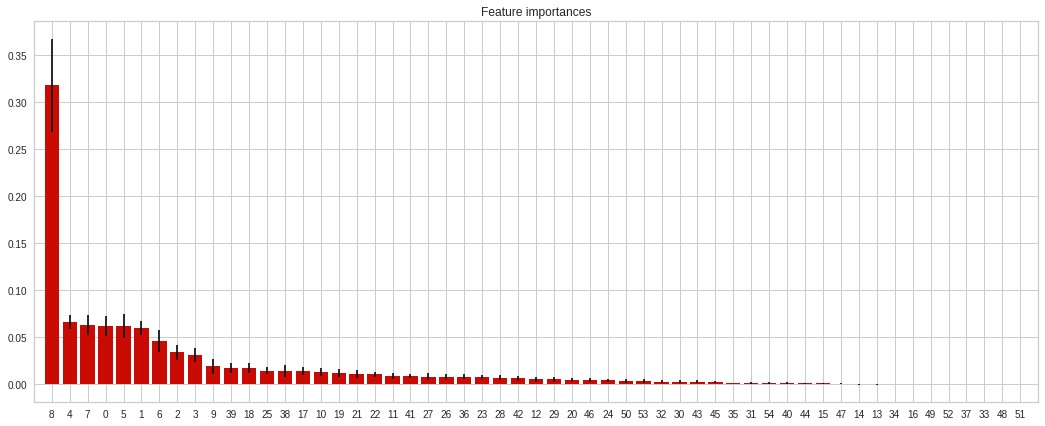

In [42]:
#FFinding the important features to y_total
indices, importances = return_feature_rank_from_RF(df_total, y_total)

In [43]:
# Only including those features that have a feature importance of 0.05
idx = np.where(importances > 0.05)
selected_columns = df_train.columns[idx]
print('The retained columns/features were:')
print(selected_columns)
df_clus = df_total[selected_columns].values 

The retained columns/features were:
Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'ExitRates', 'PageValues'],
      dtype='object')


In [44]:
#creating a new dataset to only include the reduced features which are the output of the PCA algorithm
df_reduced_PCA = PCA(n_components=4).fit_transform(df_total)
print(df_reduced_PCA.shape)

(4241, 4)


#### Task 2A

Applying K-means Clustering



*   Based on the elbow plot, after 4 clusters, we don't really see a reduction in Distortion Score
* Applying k-means clustering on the PCA reduced dataset





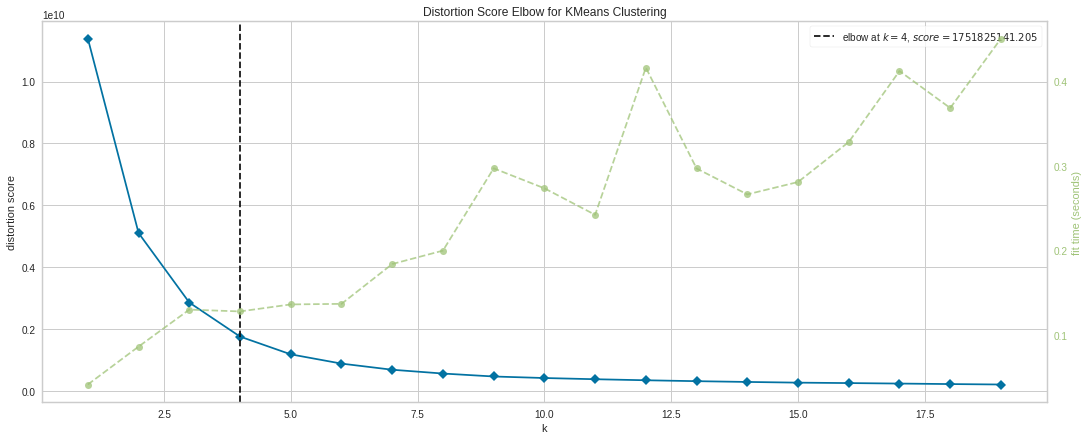

In [45]:
#initializing the kmeans model and plotting the elbow plot to find the optimum number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df_reduced_PCA)
visualizer.show()   


In [46]:
#initializing the model with 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 0)

#fitting the model on reducted data
kmeans.fit(df_reduced_PCA)

# creating a variable called clusters and adding all clusters to it
clusters = kmeans.predict(df_reduced_PCA)

#### Task 2B - Cluster Analysis

I create a new dataset with all the features before I created Dummy Variables. I add the clusters and the target variable to the dataset as well so that I can explore the dataset from multiple directions

In [47]:
#creating a datase with the training variables and the clusters to be able to visualize further
df_pp = pd.concat([df_train, df_test])
df_pp['clusters'] = clusters
df_pp['Revenue'] = pd.concat([y_train, y_test])

#### Cluster Analysis

* Cluster 0
     * is the largest cluster. It has 3160 observations, covers about 75% of observations 
     * has only 12% of customers making a purchase
* Cluster 1 and cluster 2 
     * are the smallest clusters making up for about 4% of the observations
     * Cluster 1 has a higher % of customers making a purchase — 22%
     * cluster 2 has 12% of customers making a purchase
* Cluster 3 
     * covers 21% of obseervations
     * has 12% of customers making a purchase



In [48]:
df_pp.groupby(by=[ "clusters", "Revenue"])["clusters"].count()

clusters  Revenue
0         0          2787
          1           373
1         0           121
          1            34
2         0            15
          1             2
3         0           751
          1           158
Name: clusters, dtype: int64

In [49]:
df_pp.groupby(by=[ "clusters", "Revenue"])["clusters"].count()/ df_pp.groupby(by=[ "clusters"])["clusters"].count()

clusters  Revenue
0         0          0.881962
          1          0.118038
1         0          0.780645
          1          0.219355
2         0          0.882353
          1          0.117647
3         0          0.826183
          1          0.173817
Name: clusters, dtype: float64

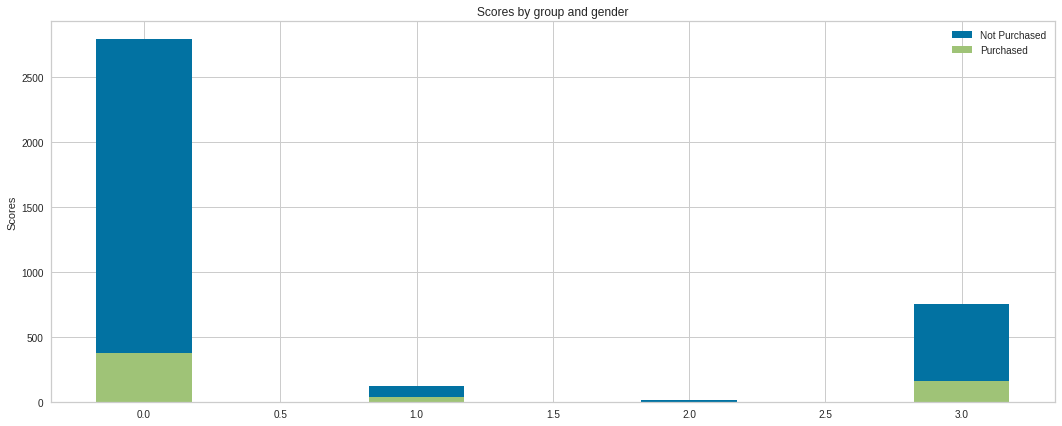

In [50]:
labels = [0, 1, 2, 3]
not_purchased = df_pp.groupby(by=[ "Revenue", "clusters"])["clusters"].count()[0]
purchased = df_pp.groupby(by=[ "Revenue", "clusters"])["clusters"].count()[1]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, not_purchased, width, label='Not Purchased')
ax.bar(labels, purchased, width, label='Purchased')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()



*   I am casting a wide net and doing a bi-variate analysis of all variables compared with all other variables with the clusters layered in to begin with
*   Down below, I dive deep into some variables
*   While there's a lot going on, I see two things stand out very clearly: 
      * ProductRelated and ProductRelated_Duration have the strongest relationship with how the clusters are created
      * I don't see a strong relationship with Revenue. I would assume that a high ProductRelated and ProductRelated_Duration feature will have a strong correlation with whether a customer purchases or not. However, that is not the case
      * I see some relationship with TrafficType but its not very strong



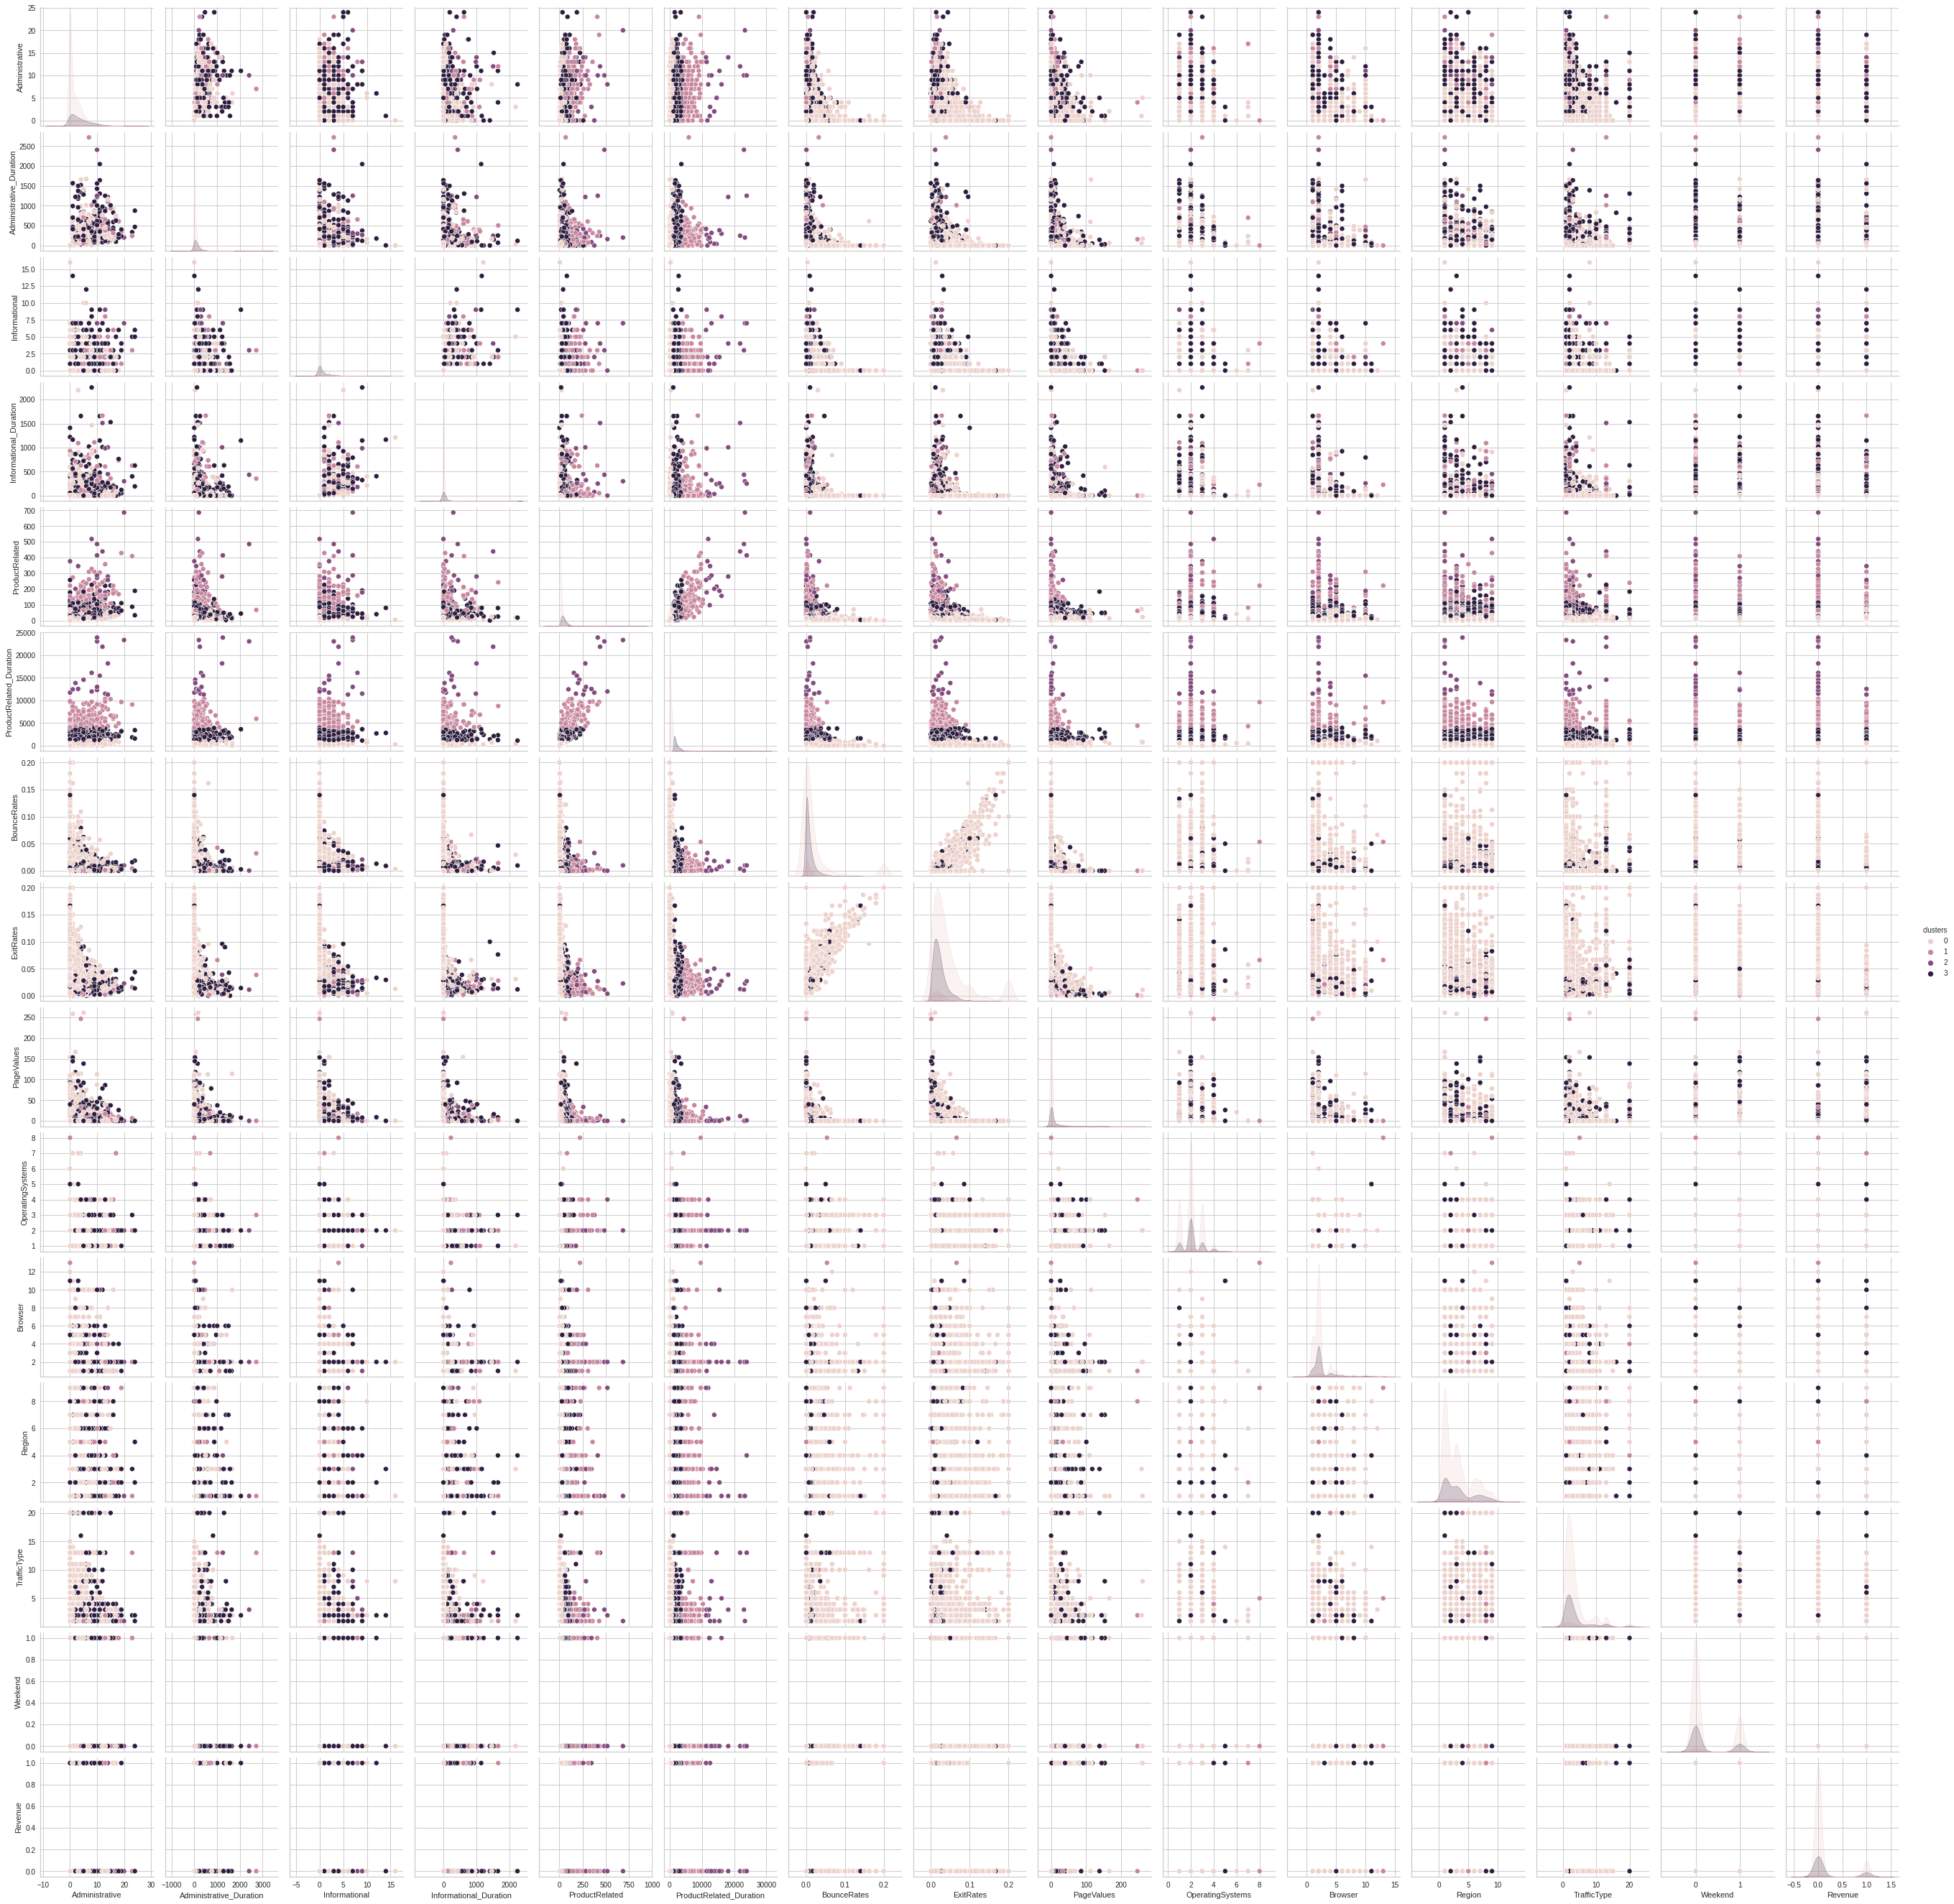

In [51]:
sns.pairplot(df_pp, hue = 'clusters')

* In my deep dive, I'm noticing that PageValues shows no relationship with how the clusters are created even though its the most correlated feature with Revenue as we have seen above
* Since there isn't a strong correlation with TrafficType, there's no cluster that represents a new visitor vs. an returning visitor
* Cluster 0 represents those customers that spend a medium to high amount of time on a ProductRelated page, whereas Cluster 1, and cluster 3 show represent customers that spend a low to medium amoount of time on product related pages
* cluster 2 represents customers that spend a high amount of time on product related pages
* there's no correlation with Revenue which makes me believe that the data naturally doesn't separate itself between those that make a purchase and those that don't

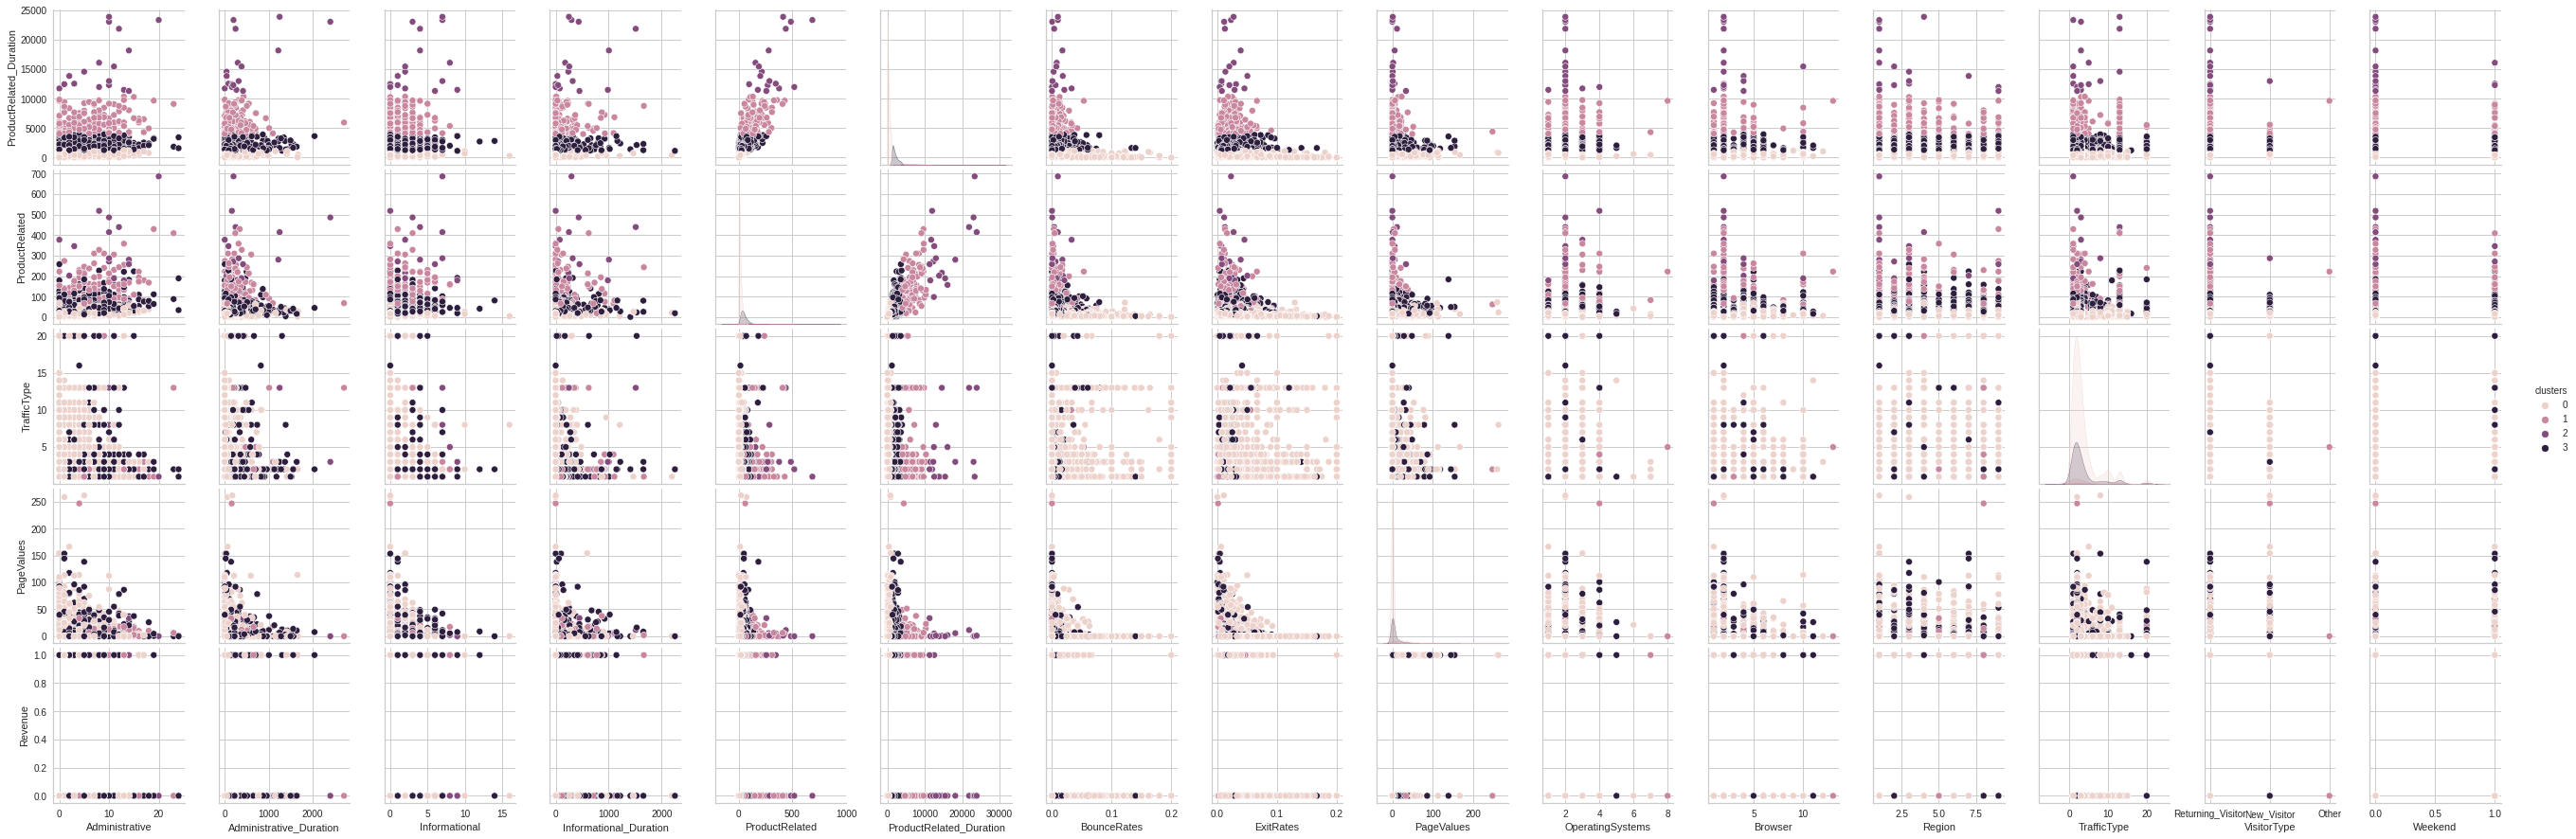

In [52]:
#deep dive into ProductRelated, ProductRelated_Duration, TrafficType, PageValue and Revenue
sns.pairplot(df_pp, y_vars=['ProductRelated_Duration', 'ProductRelated', 'TrafficType', 'PageValues','Revenue'],
                  x_vars=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend'], hue = 'clusters')

Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

If you do not consider the records from Oct-Dec, generate the classification performance on test data

After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

Point breakdown:

( 2 points) Correctly splits the data by month into labeled, unlabeled, and test
(8 points) Generate labels for unlabeled samples with a self labeling technique
(5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

#### Task 3

##### Loading and Pre-processing the data



*   Creating dummy variables and 
*   changing boolean variables into binary variables



In [53]:
#creating a new dataset for label spreading
df_ls = df

In [54]:
#creating dummy variables
df_ls_d = pd.get_dummies(data=df_ls, columns=['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Browser'], drop_first=True)

In [55]:
# converting Weekend and Revenue into binary variables. 
tf_mapping = {False:0, True:1}

df_ls_d['Weekend'] = df_ls_d['Weekend'].map(tf_mapping)
df_ls_d['Revenue'] = df_ls_d['Revenue'].map(tf_mapping)

# Converting Month into numerical variable
month_mapping = {'May':5, 'June': 6, 'Jul':7, 'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov':11, 'Dec': 12, 'Feb': 2, 'Mar':3}
df_ls_d['Month'] = df_ls_d['Month'].map(month_mapping)

In [56]:
df_ls_d

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  Weekend  \
0         0.200000   0.200000    0.000000         0.0      2        0   
1         0.000000   0.100000    0.000000         0.0      2        0   
2         0.200000   0.200000    0.000000         0.0      2        0   
3         0.050000   0.140000    0.000000         0.0      2        0   
4         0.020000   0.050000    0.000000         0.0      2        1   
...            ...        ...         ...         ...    ...      ...   
12325     0.007143   0.029031   12.241717         0.0     12        1   
12326     0.000000   0.021333    0.000000         0.0     11        1   
12327     0.083333   0.086667    0.000000         0.0     11        1   
12328     0.000000   0.021053    0.000000         0.0     11        0   
12329     0.000000   0.066667    0.000000         0.0     11        1   

       Revenue  OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  \
0            0                   0                   0                   0   
1            0                   1                   0                   0   
2            0                   0                   0                   1   
3            0                   0                   1                   0   
4            0                   0                   1                   0   
...        ...                 ...                 ...                 ...   
12325        0                   0                   0                   1   
12326        0                   0                   1                   0   
12327        0                   0                   1                   0   
12328        0                   1                   0                   0   
12329        0                   0                   1                   0   

       OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
12325                   0               

I've created 3 trypes of data



*   Label: I create ta test and train set because I want to check how well I've trained my label spreading algorithm before using it on unlabeled data and then finally using it for classification
      * Label Train: June, July, August
      * Label Test: September
*   Unlabel: October, November, December
*   Test: February, March



In [57]:
# Label Train months: June, July, August
label_months_train = [6, 7, 8]

#Label test months: September
label_months_test = [9]

#Unlabel months: October, November, December
unlabel_months = [10, 11, 12]

#Test Months: Feb and March
test_months = [2, 3]

#creating the datasets
df_label_train = df_ls_d[df_ls_d["Month"].isin(label_months_train)]
df_label_test = df_ls_d[df_ls_d["Month"].isin(label_months_test)]
df_unlabel = df_ls_d[df_ls_d["Month"].isin(unlabel_months)]
df_test = df_ls_d[df_ls_d["Month"].isin(test_months)]

In [58]:
#creating label_train X and y
y_label_train = df_label_train['Revenue']
df_label_train = df_label_train.drop(['Revenue'], axis = 1)

#creating label_test X and y
y_label_test = df_label_test['Revenue']
df_label_test = df_label_test.drop(['Revenue'], axis = 1)


#creating unlabel X and y
y_unlabel = pd.Series(np.negative(np.ones(df_unlabel.shape[0])), dtype=int)
df_unlabel = df_unlabel.drop(['Revenue'], axis = 1)

#creating label train total — y_test has only negative 1s instead of the revenue column so that I can tune the label spreading model on it
y_train_tot = pd.concat([y_label_train,pd.Series(np.negative(np.ones(df_label_test.shape[0])), dtype = int)])
df_train_tot = pd.concat([df_label_train, df_label_test])

#creating the final test X and y
y_test = df_test['Revenue']
df_test = df_test.drop(['Revenue'], axis = 1)

##### Label Spreading Model Training, Fitting, and Predicting

* I try out both Label Spreading and Label Propogation by Label Spreading gives me better results
* I try out a variety of neighbors to see what works

In [59]:
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

rec_score = []
neigh_val = [2,3,5,7,9,11, 27]
for n in range(len(neigh_val)):
  ls_mod_check = LabelSpreading(kernel='knn', n_neighbors=neigh_val[n])
  ls_mod_check.fit(df_train_tot, y_train_tot)
  ls_pred = ls_mod_check.predict(df_label_train)
  rec  = recall_score(y_label_train, ls_pred)
  rec_score.append(rec)

best_recall_score = max(rec_score)
params = neigh_val[rec_score.index(best_recall_score)]

print(f"best_recall: {best_recall_score:.4f}, best n_neighbors: {params:.0f}")

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


best_recall: 0.4620, best n_neighbors: 3


I'm optimizing based on Recall because the dataset is very imbalanced. I want to reduce the false negatives in the dataset. 

I think its very important to get predict whether or not someone made the purchase correctly in this case because that is what will have an impact on the classification model that I will fit later on. 

In [60]:
#fit the model below using 3 neighbors
ls_mod_1 = LabelSpreading(kernel='knn',
               n_neighbors=3)
ls_mod_1.fit(df_train_tot, y_train_tot)

ls_mod_pred_1 = ls_mod_1.predict(df_label_test)

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


As you can see below, I'm not getting very high precision, recall or f1-score. Accuracy is decent but I think that's because the bulk of the sessions don't end up in a purchase. 

I would like to test out a couple of more algorithms to improve performance in the the future but will use this for now

In [61]:
#Printing the evaluation metrics based on predicted values for label test and the true label test
def evaluation_metric_print(test_true, pred_true):
  tn, fp, fn, tp = confusion_matrix(test_true, pred_true).ravel()
  acc   = accuracy_score(test_true, pred_true)
  rec   = recall_score(test_true, pred_true)
  prec  = precision_score(test_true, pred_true)
  f1    = f1_score(test_true, pred_true)
  print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
  print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')

evaluation_metric_print(y_label_test, ls_mod_pred_1)

Accuracy = 0.7745535714285714, Precision = 0.391304347826087, Recall = 0.313953488372093, F1-score = 0.34838709677419355
tn=320, fp=42, fn=59, tp=27


Using the model to predict labels for the unlabeled data — October, November, and December

In [62]:
# initializing the model
ls_mod_2 = LabelSpreading(kernel='knn',
               n_neighbors=3)

#training the model on the entire labeled dataset
ls_mod_2.fit(pd.concat([df_train_tot, df_unlabel]) , pd.concat([y_label_train, y_label_test, y_unlabel]))

#predicting it on unlabeled data
ls_mod_pred_2 = ls_mod_2.predict(df_unlabel)

/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Combining the labeled and unlabeled data so that I can predict the results for the test data based on that

In [63]:
#creating a complete dataset that has months June through December
df_train_with_labels = pd.concat([df_train_tot, df_unlabel])

#creating a complete y label that has months June through December, out of which October - December are labeled through the label spreading algorithm
y_train_with_labels = pd.concat([y_label_train, y_label_test, pd.Series(ls_mod_pred_2)])

* Predicting labels for test dataset based on June through December (labeled + self-labels) 

* Printing evaluation metrics

In [64]:
model = LogisticRegression(C=10, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

model.fit(df_train_with_labels, y_train_with_labels)

pred_w_labels = model.predict(df_test)

evaluation_metric_print(y_test, pred_w_labels)

Accuracy = 0.9249163079866093, Precision = 0.7638888888888888, Recall = 0.28205128205128205, F1-score = 0.41198501872659177
tn=1879, fp=17, fn=140, tp=55


* Predicting labels for test dataset based on June through September (labels only) 

* Printing evaluation metrics

In [65]:
model.fit(df_train_tot, y_train_tot)
pred_wo_labels = model.predict(df_test)
evaluation_metric_print(y_test, pred_wo_labels)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy = 0.9282639885222381, Precision = 0.7922077922077922, Recall = 0.3128205128205128, F1-score = 0.44852941176470584
tn=1880, fp=16, fn=134, tp=61


I'm not surprised that Labels only does better because the performance on the labels spreading algorithm was very poor. 

I think after improving that model, labels + self labels will do better than labels only

|Model | Accuracy | Precision  | Recall | F1- Score|
|:-------:|:------:|:------:| :------: | :------: |
| Logistic Regression (Labels + Self Labels) | 92.4% | 76.3% | 28.2% | 41.2% |
| Logistic Regression (Labels Only) | 92.8% | 79.2% | 31.3% | 44.9% | 
